<a href="https://colab.research.google.com/github/VivekRaj2708/Lab5_CS203/blob/main/Lab_5_(STT_For_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS203 Lab 5

## Team Number: 33
## Team Members

### Member 1
- Name: Vivek Raj
- Roll No: 23110362
- Github: VivekRaj2708

### Member 2
- Name: Sharvari Mirge
- Roll No: 23110298
- Github: msharvari31


# Task 1: Data Augmentation


## Installing Modules

- We have to install augly for Image Augmentation
- We also have to remove the directory `catsanddogs` for multiple runs

In [370]:
!pip install augly
!rm -rvf catsanddogs/

removed 'catsanddogs/cats/cat_124.jpg'
removed 'catsanddogs/cats/cat_574.jpg'
removed 'catsanddogs/cats/cat_113.jpg'
removed 'catsanddogs/cats/cat_158.jpg'
removed 'catsanddogs/cats/cat_355.jpg'
removed 'catsanddogs/cats/cat_234.jpg'
removed 'catsanddogs/cats/cat_422.jpg'
removed 'catsanddogs/cats/cat_496.jpg'
removed 'catsanddogs/cats/cat_114.jpg'
removed 'catsanddogs/cats/cat_94.jpg'
removed 'catsanddogs/cats/cat_279.jpg'
removed 'catsanddogs/cats/cat_106.jpg'
removed 'catsanddogs/cats/cat_140.jpg'
removed 'catsanddogs/cats/cat_358.jpg'
removed 'catsanddogs/cats/cat_395.jpg'
removed 'catsanddogs/cats/cat_18.jpg'
removed 'catsanddogs/cats/cat_313.jpg'
removed 'catsanddogs/cats/cat_473.jpg'
removed 'catsanddogs/cats/cat_587.jpg'
removed 'catsanddogs/cats/cat_1.jpg'
removed 'catsanddogs/cats/cat_281.jpg'
removed 'catsanddogs/cats/cat_523.jpg'
removed 'catsanddogs/cats/cat_433.jpg'
removed 'catsanddogs/cats/cat_538.jpg'
removed 'catsanddogs/cats/cat_244.jpg'
removed 'catsanddogs/cats/cat

## Downloading the Dataset

- We download the dataset using `kagglehub`
- Copy only the `test` data as specified by the instructions for training our model

In [371]:
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

# Only use the test dataset as provided
shutil.copytree(f"{path}/test", f"{os.getcwd()}/catsanddogs")
os.mkdir("catsanddogs/augmented")

## Loading the Images onto memmory

1. We will be using the `PIL` module to load the images onto the memmory
2. We will check if it is a file or not using the `isfile` functon

In [372]:
images_cat = []
images_dog = []
from PIL import Image
from os import listdir
from os.path import isfile, join
import numpy as np



mypath = f"{os.getcwd()}/catsanddogs/cats"

for file_dir in listdir(mypath):
  if (isfile(join(mypath, file_dir))):
    images_cat.append(Image.open(join(mypath, file_dir)))

mypath = f"{os.getcwd()}/catsanddogs/dogs"

for file_dir in listdir(mypath):
  if (isfile(join(mypath, file_dir))):
    images_dog.append(Image.open(join(mypath, file_dir)))

dataset = images_cat + images_dog
labels = ["cats"]*70 + ["dogs"]*70
len(dataset), len(labels)

(140, 140)

In [373]:
def RandomShuffle(a: list, b: list) -> tuple:
  c = list(zip(a, b))
  random.shuffle(c)
  return zip(*c)

## Train Test Split

- We will use the `train_test_split` from `sklearn` to due random splitting
- We will split the `cat` and `dog` datasets sepecrately to ensure **even distribution of classes**
- We will then finally merge the `shuffled datasets` to get the final train test split

In [374]:
from sklearn.model_selection import train_test_split
import random

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_cat, ["cats"]*70 , test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(images_dog, ["dogs"]*70 , test_size=0.2, random_state=42)

X_train = X_train_1 + X_train_2
X_test = X_test_1 + X_test_2
y_train = y_train_1 + y_train_2
y_test = y_test_1 + y_test_2
RandomShuffle(X_train, y_train)
RandomShuffle(X_test, y_test)
len(X_train), len(X_test), len(y_train), len(y_test)

(112, 28, 112, 28)

## Image Augmentation
- We have used the following Image Augmentation tools
    1. Overlaying an emoji
    2. Padding a square
    3. Blurring the Image
    4. Rotating the Image
    5. Changing the contrast
    6. Resizing the Image
    7. Scaling the Image
    8. Changing the opacity
    9. Shuffling the pixel value
    10. Overlay text on the image

- Then we choose any 6 of the above tools and we generate two augmented images using first 3 tools for the first image, and the rest for the second image.

     

In [375]:
import augly.image as imaugs
import random

def Augment(image: Image) -> list:

  augmentations = [lambda aug_data: imaugs.overlay_emoji(aug_data, opacity=0.85, emoji_size=0.15),
                   lambda aug_data: imaugs.pad_square(aug_data),
                   lambda aug_data: imaugs.blur(aug_data, radius=1),
                   lambda aug_data: imaugs.rotate(aug_data, degrees=10*random.random()*360),
                   lambda aug_data: imaugs.color_jitter(aug_data, contrast_factor=0.1*random.random() + 0.4),
                   lambda aug_data: imaugs.resize(aug_data, height=256, width=256),
                   lambda aug_data: imaugs.scale(aug_data, factor=random.random() + 0.3),
                   lambda aug_data: imaugs.opacity(aug_data, level=0.7 + random.random()*0.1),
                   lambda aug_data: imaugs.shuffle_pixels(aug_data, factor=0.1*random.random()),
                   lambda aug_data: imaugs.overlay_text(aug_data)]

  Labels = ["Emoji", "Padding", "Bluring", "Rotation", "Contrast", "Resize", "Scaling", "Opacity", "Shuffle", "Overlay Text"]


  image0 = image.copy()
  image1 = image.copy()
  augmentation0 = random.sample(augmentations, 6)

  for aug in augmentation0[0:3]:
    image0 = aug(image0)

  for aug in augmentation0[3:]:
    image1 = aug(image1)

  print("Image 1:", end=" ")
  for i in range(3):
    print(Labels[augmentations.index(augmentation0[i])], end=" -> ")
  print("Done")

  print("Image 2:", end=" ")
  for i in range(3):
    print(Labels[augmentations.index(augmentation0[i + 3])], end=" -> ")
  print("Done")
  return [image0, image1]



### Sample Augmented Image

Image 1: Padding -> Contrast -> Bluring -> Done
Image 2: Overlay Text -> Emoji -> Opacity -> Done


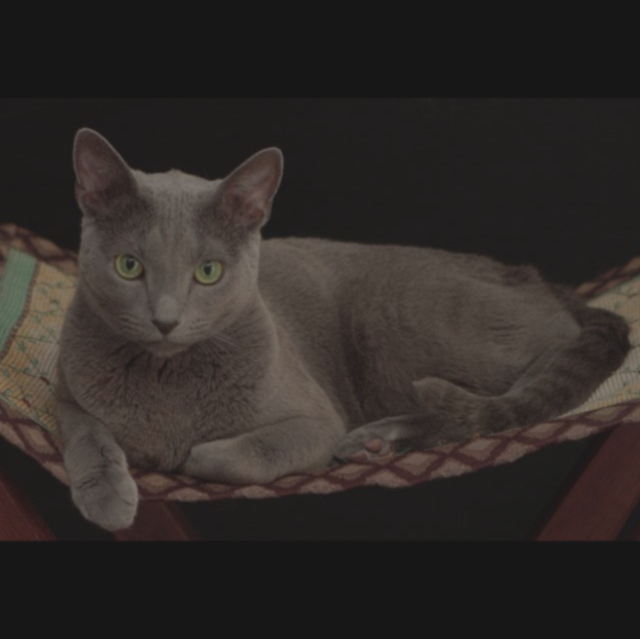

In [376]:
augments = Augment(X_train[0])
augments[0]

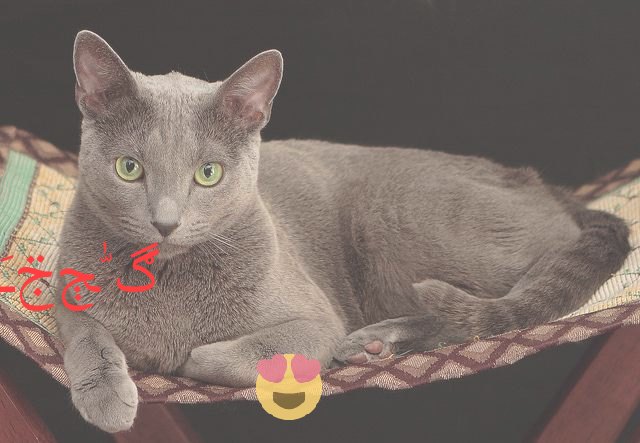

In [377]:
augments[1]

### Augmenting the entire training dataset
- This generates a augmented image set of 224 images.

In [378]:
augmented_dataset = []

for x in X_train:
  augmented_dataset.extend(Augment(x))

Image 1: Opacity -> Rotation -> Scaling -> Done
Image 2: Padding -> Contrast -> Resize -> Done
Image 1: Overlay Text -> Padding -> Resize -> Done
Image 2: Bluring -> Shuffle -> Scaling -> Done
Image 1: Emoji -> Opacity -> Resize -> Done
Image 2: Bluring -> Scaling -> Padding -> Done
Image 1: Opacity -> Scaling -> Emoji -> Done
Image 2: Rotation -> Bluring -> Padding -> Done
Image 1: Resize -> Overlay Text -> Contrast -> Done
Image 2: Bluring -> Shuffle -> Opacity -> Done
Image 1: Shuffle -> Opacity -> Bluring -> Done
Image 2: Rotation -> Contrast -> Padding -> Done
Image 1: Scaling -> Opacity -> Padding -> Done
Image 2: Overlay Text -> Bluring -> Contrast -> Done
Image 1: Rotation -> Shuffle -> Overlay Text -> Done
Image 2: Scaling -> Opacity -> Contrast -> Done
Image 1: Bluring -> Opacity -> Scaling -> Done
Image 2: Rotation -> Resize -> Padding -> Done
Image 1: Opacity -> Contrast -> Resize -> Done
Image 2: Overlay Text -> Rotation -> Emoji -> Done
Image 1: Rotation -> Emoji -> Opaci

### Plotting the Dataset
Below we have plotted the data in bar graph for the count of
1. Train & Test
2. Augmented Train Set & Non-Augmented Train Set
3. Number of Cat & Dog Images in Non-Augmented Train Set and Test Set

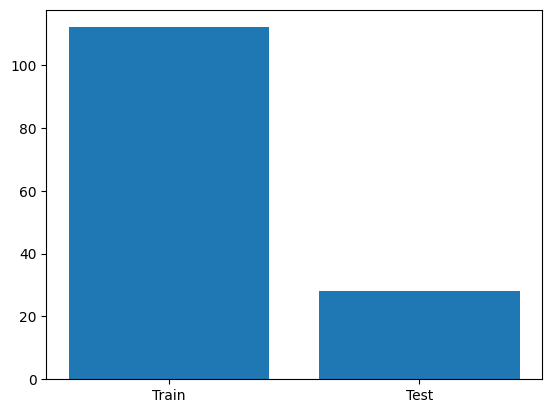

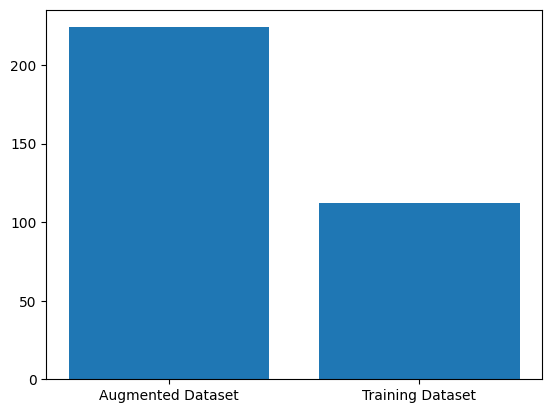

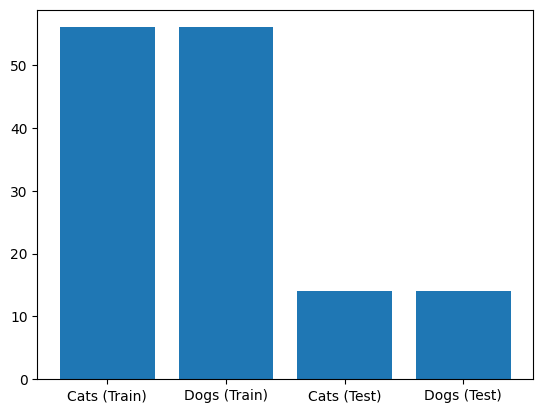

In [379]:
import matplotlib.pyplot as plt

plt.bar(["Train", "Test"], [len(X_train), len(X_test)])
plt.show()

plt.bar(["Augmented Dataset", "Training Dataset"], [len(augmented_dataset), len(X_train)])
plt.show()

plt.bar(["Cats (Train)", "Dogs (Train)", "Cats (Test)", "Dogs (Test)"], [len(X_train_1), len(X_train_2), len(X_test_1), len(X_test_2)])
plt.show()

### Saving the data to File tree

In [380]:
try:
  shutil.rmtree("X_Train")
  shutil.rmtree("X_Test")
except Exception:
  pass

os.mkdir("X_Train")
os.mkdir("X_Train/Cats")
os.mkdir("X_Train/Dogs")

os.mkdir("X_Test")
os.mkdir("X_Test/Cats")
os.mkdir("X_Test/Dogs")

for x in range(len(y_train)):
  if y_train[x] == "cats":
    X_train[x].save(f"X_Train/Cats/{x}.jpg")
  else:
    X_train[x].save(f"X_Train/Dogs/{x}.jpg")

for x in range(len(y_test)):
    if y_test[x] == "cats":
      X_test[x].save(f"X_Test/Cats/{x}.jpg")
    else:
      X_test[x].save(f"X_Test/Dogs/{x}.jpg")

In [381]:
try:
  shutil.rmtree("X_Train_Aug")
except Exception:
  pass

os.mkdir("X_Train_Aug")
os.mkdir("X_Train_Aug/Cats")
os.mkdir("X_Train_Aug/Dogs")

for x in range(len(y_train)):
  if y_train[x] == "cats":
    imaugs.scale(augmented_dataset[2*x], factor=1, output_path=f"X_Train_Aug/Cats/{2*x}.jpg")
    imaugs.scale(augmented_dataset[2*x + 1], factor=1, output_path=f"X_Train_Aug/Cats/{2*x + 1}.jpg")
  else:
    imaugs.scale(augmented_dataset[2*x], factor=1, output_path=f"X_Train_Aug/Dogs/{2*x}.jpg")
    imaugs.scale(augmented_dataset[2*x + 1], factor=1, output_path=f"X_Train_Aug/Dogs/{2*x + 1}.jpg")


# Task 2: Model Training



### Installing the prerequisites

In [382]:
!pip install validators matplotlib

In [383]:
from transformers import AutoImageProcessor, ResNetForImageClassification, ResNetConfig
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50

### Transforming and Loading the data
- ResNet-50 expects the input images to be of size 224x224.
- Hence we have to ignore all other pixels.
- This is done by the `transforms.Compose` class.
- Then we load the data with the tranform that we created.

In [384]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Define the transformation
transform = transforms.Compose([
    # transforms.PILToTensor(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_data = torchvision.datasets.ImageFolder(root="X_Train/", transform=transform)
test_data = torchvision.datasets.ImageFolder(root="X_Test/", transform=transform)
aug_data = torchvision.datasets.ImageFolder(root="X_Train_Aug/", transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=4)
aug_loader = torch.utils.data.DataLoader(aug_data, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Initialising the model weights

In [385]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight.to(device))
        m.bias.data.fill_(0.01)

### Initialising model
- We call the pre-trained ResNet-50 configuration.
- We specify the number of classes as 2 - `Dog` and `Cat`.
- We generate the model based on the configuration and apply the weights.
- We move the model to the fastest training platform (CPU/GPU).
- We have used AdamW as the optimizer and CrossEntropyLoss criteria for loss calculation.

In [386]:
config = ResNetConfig.from_pretrained("microsoft/resnet-50")
config.num_labels = 2
model = ResNetForImageClassification(config)
model.apply(init_weights)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)


<ipython-input-385-352394a2a408>:3: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  torch.nn.init.xavier_uniform(m.weight.to(device))


### ResNet-50 model architecture design and configuration

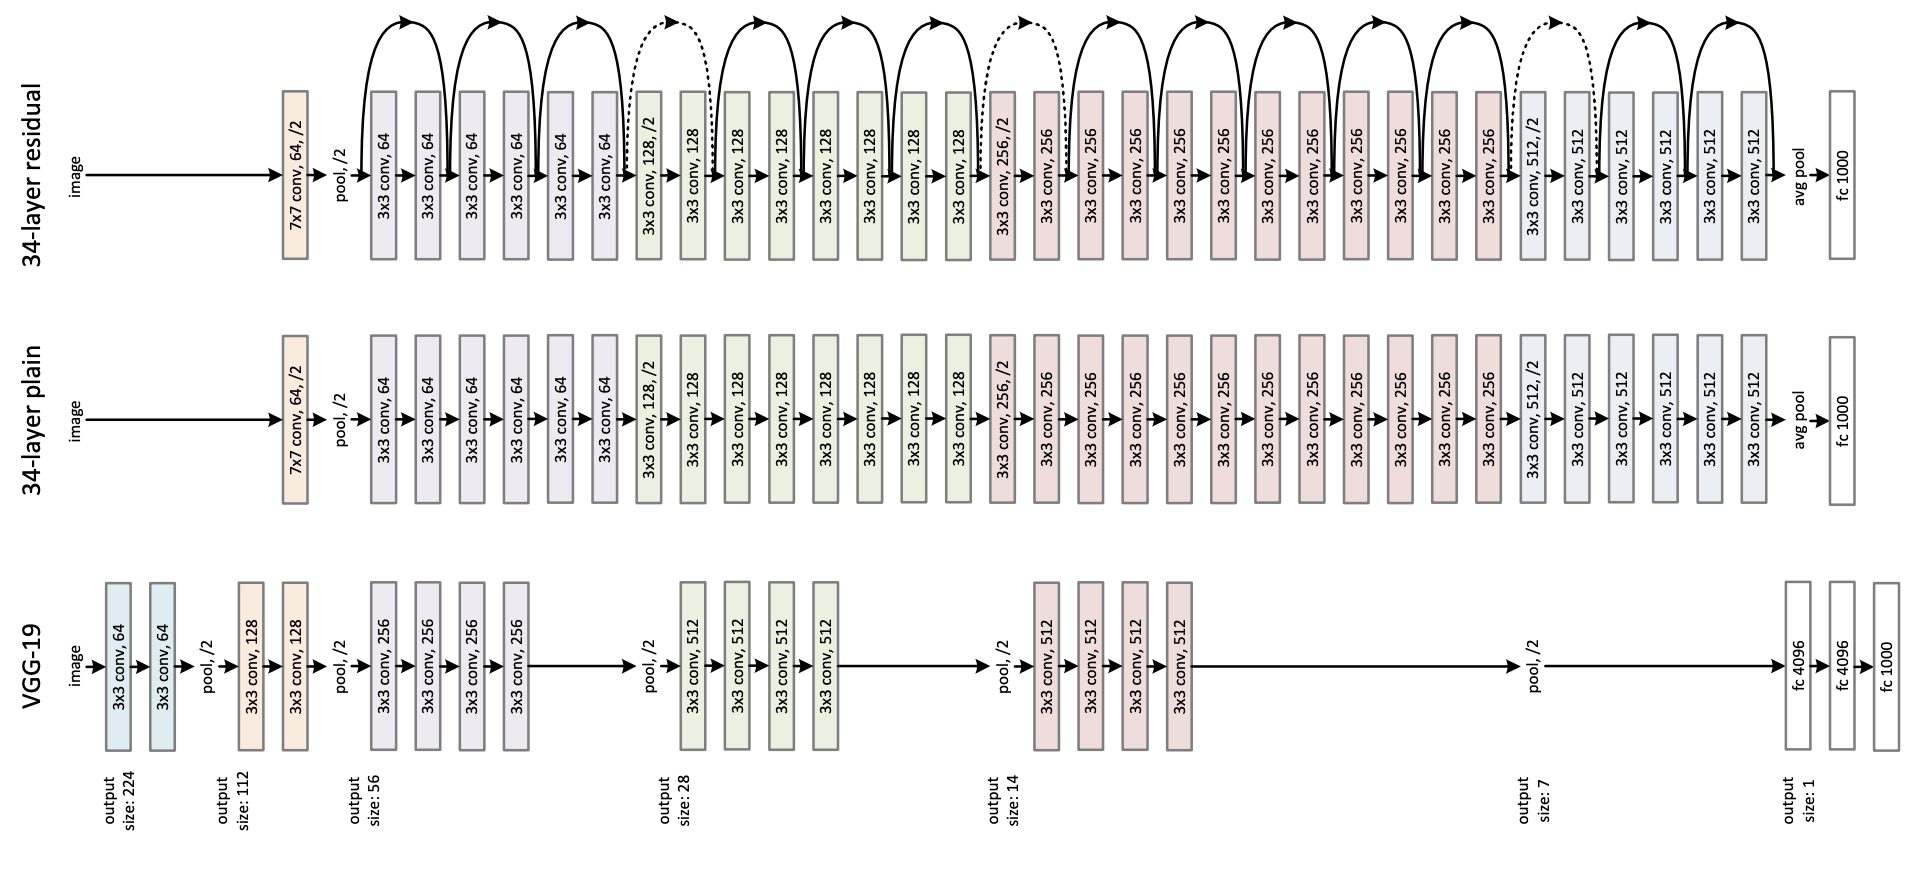

@inproceedings{he2016deep,
  title={Deep residual learning for image recognition},
  author={He, Kaiming and Zhang, Xiangyu and Ren, Shaoqing and Sun, Jian},
  booktitle={Proceedings of the IEEE conference on computer vision and pattern recognition},
  pages={770--778},
  year={2016}
}

In [387]:
model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.48.2"
}

## Model Training for Non-Augmented Dataset

In [388]:
# Define the number of epochs
num_epochs = 20

# Train the model
for epoch in range(num_epochs):
    # Train the model on the training set
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        # Move the data to the device (CPU/T4 GPU)
        inputs, labels =  inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Test Data
        outputs = model(inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() / len(train_loader)

    print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f}")

Epoch [1/20] Train Loss: 1.8712
Epoch [2/20] Train Loss: 0.9684
Epoch [3/20] Train Loss: 0.7423
Epoch [4/20] Train Loss: 0.7806
Epoch [5/20] Train Loss: 0.7062
Epoch [6/20] Train Loss: 0.6167
Epoch [7/20] Train Loss: 0.5915
Epoch [8/20] Train Loss: 0.5328
Epoch [9/20] Train Loss: 0.5093
Epoch [10/20] Train Loss: 0.6025
Epoch [11/20] Train Loss: 0.5475
Epoch [12/20] Train Loss: 0.5084
Epoch [13/20] Train Loss: 0.5157
Epoch [14/20] Train Loss: 0.3312
Epoch [15/20] Train Loss: 0.1464
Epoch [16/20] Train Loss: 0.1700
Epoch [17/20] Train Loss: 0.1043
Epoch [18/20] Train Loss: 0.2403
Epoch [19/20] Train Loss: 0.1905
Epoch [20/20] Train Loss: 0.5682


### Model Evaluation

In [389]:
# Evaluate the model on the test set
model.eval()
test_acc = 0
non_aug_labels = []
non_aug_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        # Move the data to the device
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).logits
        non_aug_labels.extend(labels.cpu().numpy())

        # Update the test accuracy
        _, preds = torch.max(outputs, 1)
        non_aug_predictions.extend(preds.cpu().numpy())
        test_acc += torch.sum(preds == labels.data)

test_acc = test_acc.double() / len(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.4286


### Metric Scores

In [390]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

accuracy = accuracy_score(non_aug_labels, non_aug_predictions)
recall = recall_score(non_aug_labels, non_aug_predictions)
precision = precision_score(non_aug_labels, non_aug_predictions)
f1 = f1_score(non_aug_labels, non_aug_predictions)

print("Acc: ", accuracy, "\nRecall:",  recall, "\nPrescision:", precision, "\nF1:", f1)

Acc:  0.42857142857142855 
Recall: 0.6428571428571429 
Prescision: 0.45 
F1: 0.5294117647058824


### Confusion Matrix

Text(50.722222222222214, 0.5, 'Predicted')

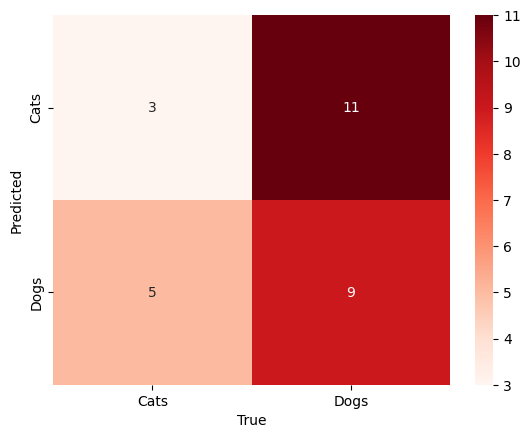

In [391]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(non_aug_labels, non_aug_predictions),
                  index = ["Cats", "Dogs"],
                  columns = ["Cats", "Dogs"])

sn.heatmap(df_cm, annot=True, cmap="Reds")
plt.xlabel("True")
plt.ylabel("Predicted")


## Resetting the Model

In [392]:
# Reset Model
model = ResNetForImageClassification(config)
model.apply(init_weights)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

<ipython-input-385-352394a2a408>:3: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  torch.nn.init.xavier_uniform(m.weight.to(device))


## Training Model for Augmented Dataset

In [393]:
# Train the model
for epoch in range(num_epochs):
    # Train the model on the training set
    model.train()
    train_loss = 0.0
    for inputs, labels in aug_loader:
        # Move the data to the device (CPU/T4 GPU)
        inputs, labels =  inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Test Data
        outputs = model(inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()  /len(aug_loader)

    print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/20] Train Loss: 1.5804
Epoch [2/20] Train Loss: 0.9217
Epoch [3/20] Train Loss: 0.7217
Epoch [4/20] Train Loss: 0.7146
Epoch [5/20] Train Loss: 0.7082
Epoch [6/20] Train Loss: 0.8049
Epoch [7/20] Train Loss: 0.6908
Epoch [8/20] Train Loss: 0.7361
Epoch [9/20] Train Loss: 0.6317
Epoch [10/20] Train Loss: 0.6011
Epoch [11/20] Train Loss: 0.6058
Epoch [12/20] Train Loss: 0.5764
Epoch [13/20] Train Loss: 0.4854
Epoch [14/20] Train Loss: 0.5601
Epoch [15/20] Train Loss: 0.6853
Epoch [16/20] Train Loss: 0.5770
Epoch [17/20] Train Loss: 0.4824
Epoch [18/20] Train Loss: 0.3126
Epoch [19/20] Train Loss: 0.3022
Epoch [20/20] Train Loss: 0.4495


### Evaluating the model

In [394]:
# Evaluate the model on the test set
model.eval()
test_acc = 0
aug_labels = []
aug_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        # Move the data to the device
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs).logits
        aug_labels.extend(labels.cpu().numpy())

        # Update the test accuracy
        _, preds = torch.max(outputs, 1)
        aug_predictions.extend(preds.cpu().numpy())
        test_acc += torch.sum(preds == labels.data)

test_acc = test_acc.double() / len(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.3571


### Metric Scores

In [395]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

accuracy = accuracy_score(aug_labels, aug_predictions)
recall = recall_score(aug_labels, aug_predictions)
precision = precision_score(aug_labels, aug_predictions)
f1 = f1_score(aug_labels, aug_predictions)

print("Acc: ", accuracy, "\nRecall:",  recall, "\nPrescision:", precision, "\nF1:", f1)

Acc:  0.35714285714285715 
Recall: 0.42857142857142855 
Prescision: 0.375 
F1: 0.4


### Confusion Matrix

[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]


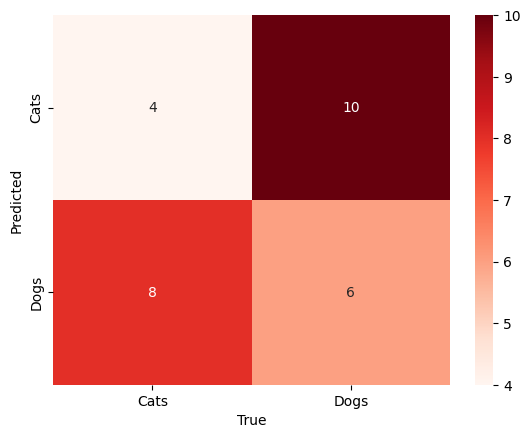

In [396]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(aug_labels, aug_predictions),
                  index = ["Cats", "Dogs"],
                  columns = ["Cats", "Dogs"])

sn.heatmap(df_cm, annot=True, cmap="Reds")
plt.xlabel("True")
plt.ylabel("Predicted")
print(aug_predictions)

## Interpretation
- We find the accuracy score of the model trained on Augmented Dataset to be poor compared to the Non-Augmented one.
- This might have occured due to the applied data augmentation methods might have distorted key features, making it harder for the model to learn distinguishing characteristics between Cats and Dogs.
- Augmentation can sometimes introduce noise, degrading the quality of the data and confusing the model during training.
- If one class was augmented more heavily than the other, it could have led to class imbalance, causing the model to bias its predictions.
- The model may have overfitted to the augmented data patterns, reducing its ability to generalize well to real, non-augmented examples.
